In [1]:
import nltk
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [3]:
coins = pd.read_parquet("../data/coins_deities_df.parquet")

In [4]:
len(coins)
plt.rcParams['font.size'] = 8
def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

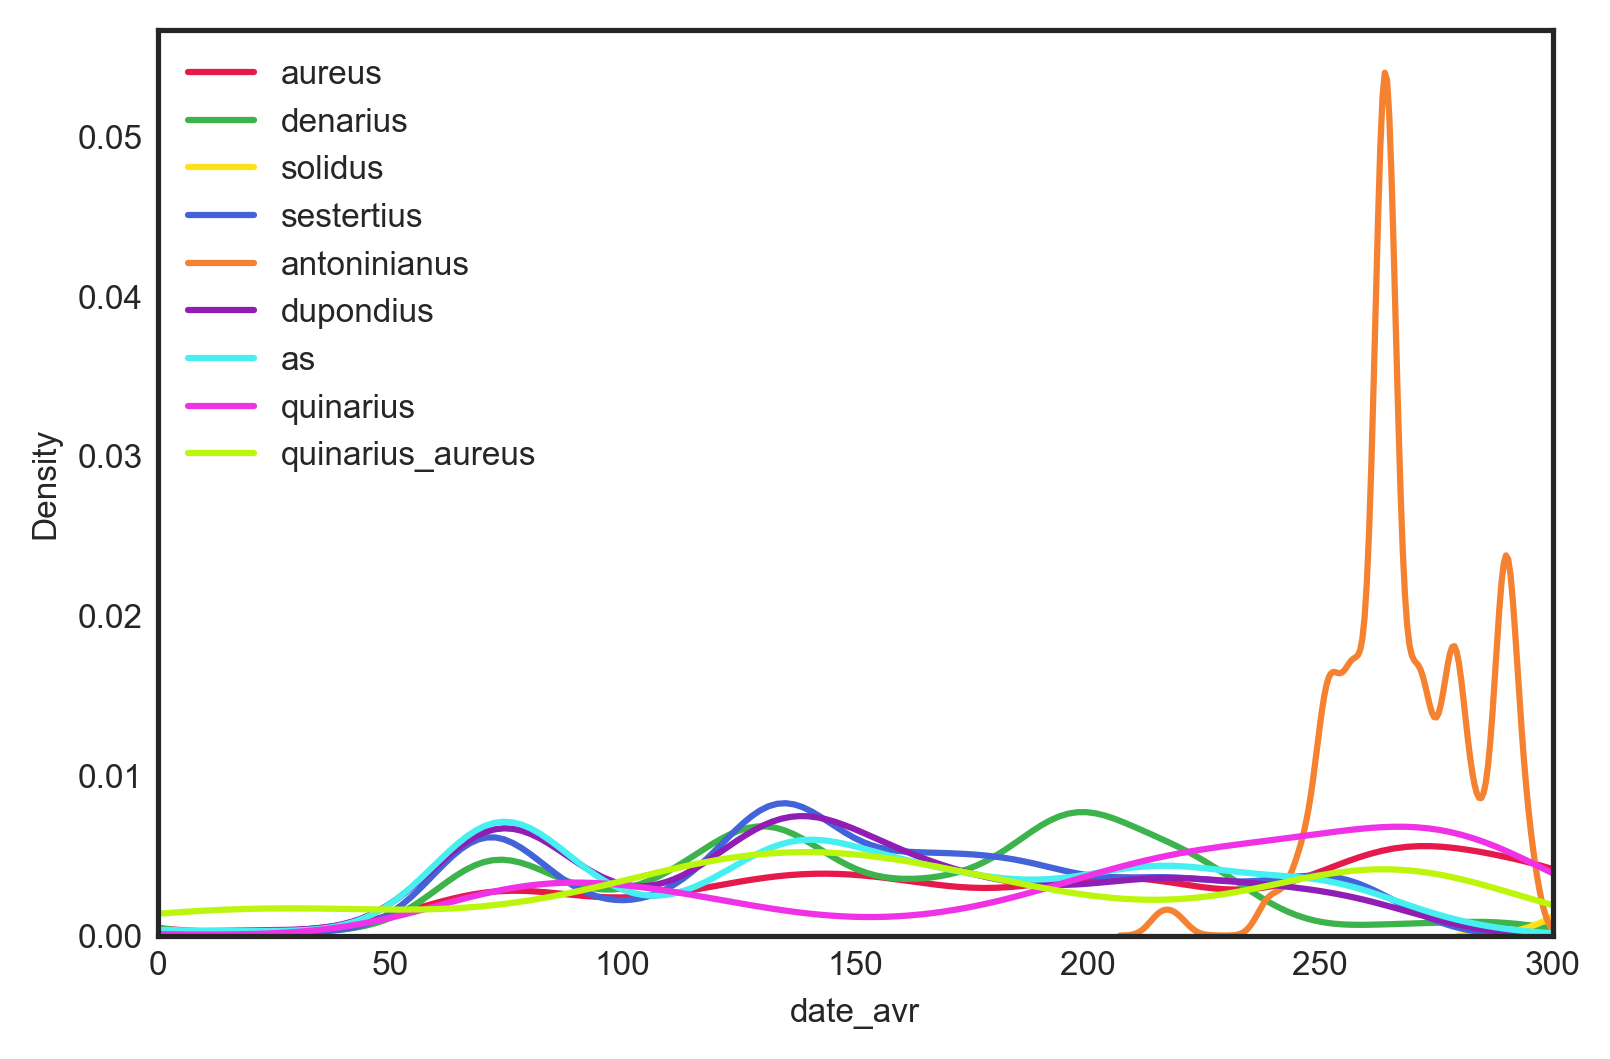

In [5]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_avr"], color=color, label=type, ax=ax)
ax.set_xlim(0,300)
ax.legend()

In [6]:
# to filter out "antoninianus"....
#coins = coins[coins["ontology#hasDenomination"] != "antoninianus"].copy()
#len(coins)

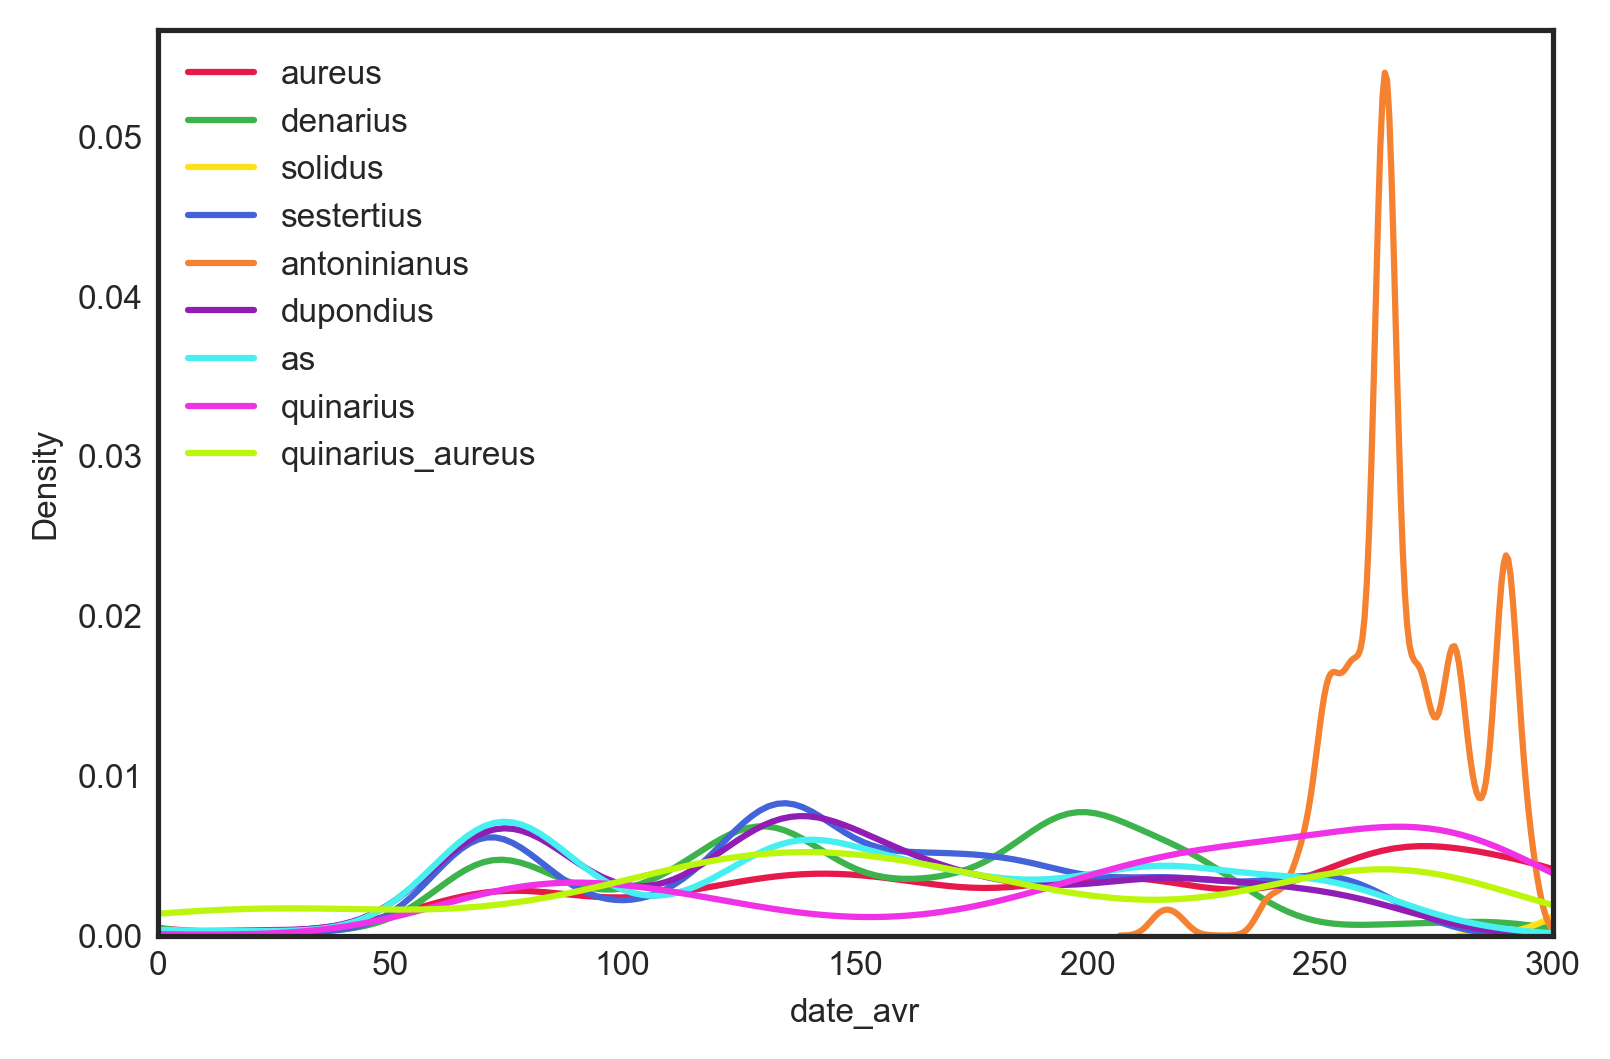

In [7]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_avr"], color=color, label=type, ax=ax, bw_adjust=1)
ax.set_xlim(0,300)
ax.legend()

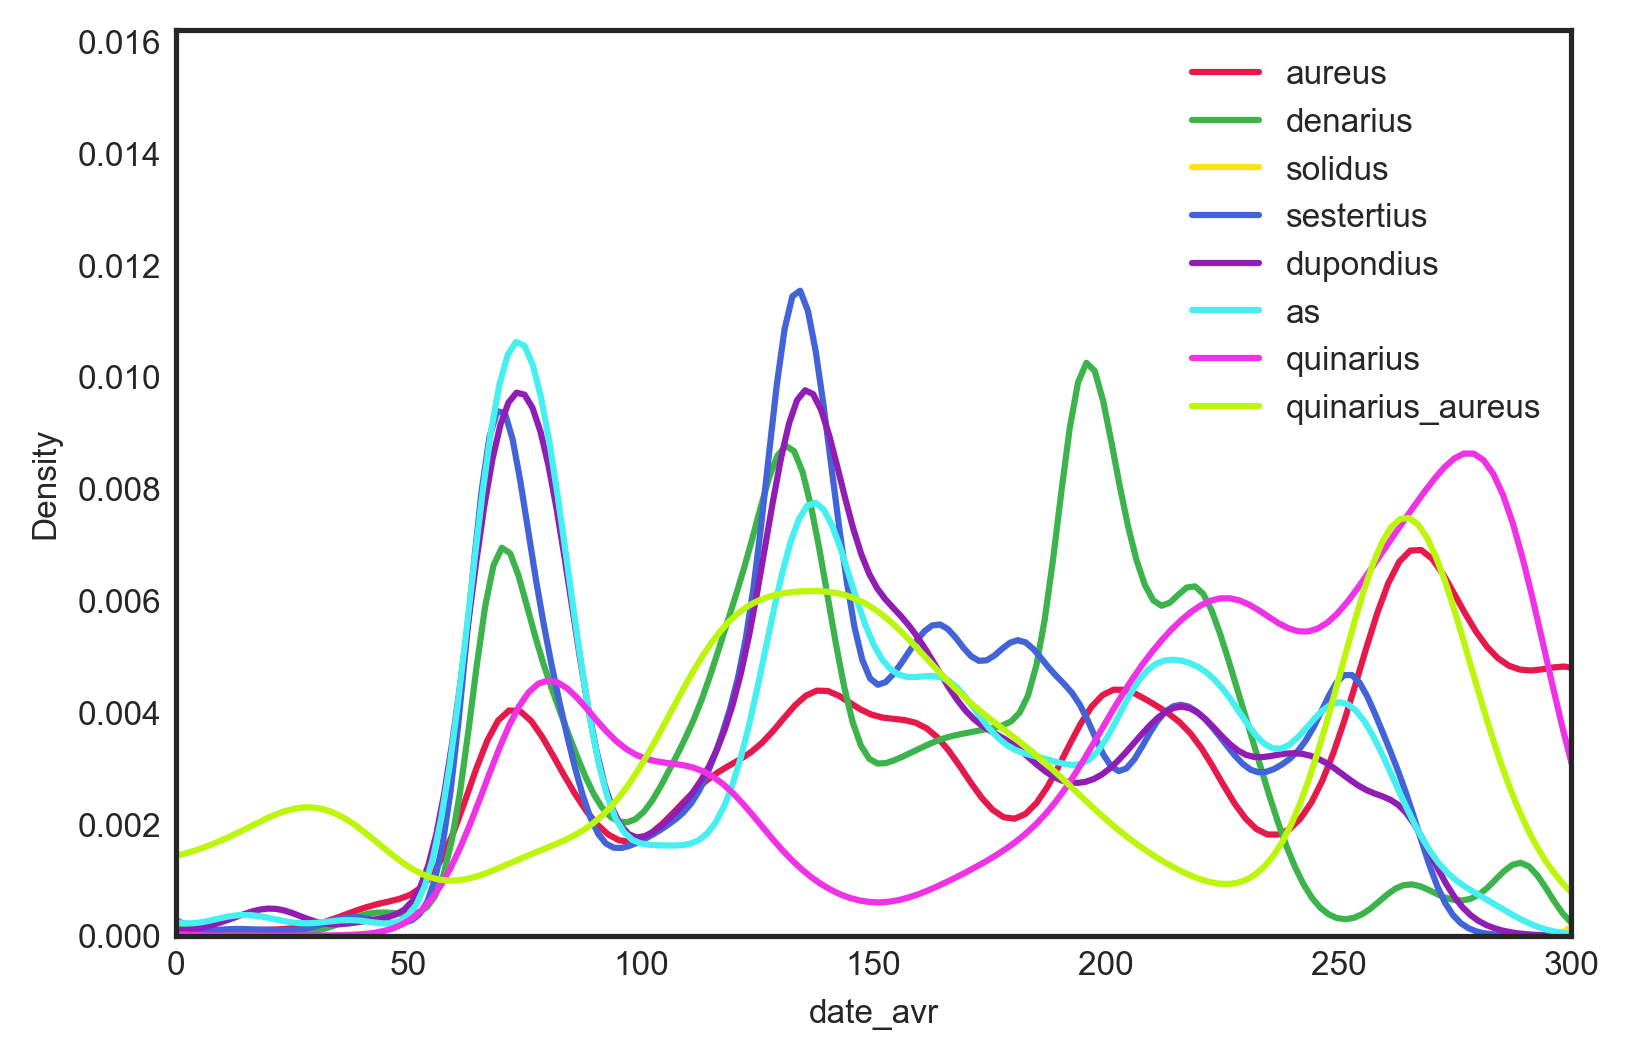

In [8]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()

for type, color in zip(coins["ontology#hasDenomination"].unique(), colors):
    if type != "antoninianus":
        sns.kdeplot(coins[coins["ontology#hasDenomination"]==type]["date_avr"], color=color, label=type, ax=ax, bw_adjust=0.5)
ax.set_xlim(0,300)
ax.legend()

In [9]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [10]:
all_deities_list_flat = [d for dl in coins["deities"] for d in dl]
deities_top20_counts = nltk.FreqDist(all_deities_list_flat).most_common(20)
deities_top20_counts

[('Victory', 5375),
 ('Pax', 1326),
 ('Mars', 1317),
 ('Roma', 1286),
 ('Fortuna', 1110),
 ('Felicitas', 972),
 ('Providentia', 928),
 ('Concordia', 895),
 ('Salus', 839),
 ('Minerva', 832),
 ('Sol', 790),
 ('Liberalitas', 675),
 ('Aequitas', 613),
 ('Spes', 612),
 ('Hercules', 560),
 ('Pietas', 554),
 ('Fides', 534),
 ('Genius', 484),
 ('Securitas', 480),
 ('Venus', 457)]

In [11]:
deities_top20 = [tup[0] for tup in deities_top20_counts]

In [12]:
start, stop = 0, 300
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_avr"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts = nltk.FreqDist(deities_list_flat_top20).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_top20)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                 "n" : 0,
                 "counts" : [],
                 "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': 0, 'n': 28, 'counts': [('Victory', 10), ('rest', 18)], 'freqs_pct': [('Victory', 35.71), ('rest', 64.29)]}
{'date': 1, 'n': 8, 'counts': [('Victory', 8), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 2, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 3, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 4, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 5, 'n': 6, 'counts': [('Victory', 6), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 6, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 7, 'n': 7, 'counts': [('Victory', 7), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0)]}
{'date': 8, 'n': 8, 'counts': [('Victory', 8), ('rest', 0)], 'freqs_pct': [('Victory', 100.0), ('rest', 0.0

In [13]:
counts = [el["n"] for el in data]
counts[:20]

[28, 8, 7, 7, 7, 6, 7, 7, 8, 8, 9, 9, 12, 10, 12, 11, 13, 12, 14, 12]

In [14]:
date_freqs_df = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df.set_index("date", inplace=True)

In [15]:
[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]

['Victory',
 'Concordia',
 'Securitas',
 'Fortuna',
 'Minerva',
 'Spes',
 'Roma',
 'Genius',
 'Mars',
 'Pax',
 'Liberalitas',
 'Salus',
 'Felicitas',
 'Aequitas',
 'Fides',
 'Pietas',
 'Venus',
 'Hercules',
 'Providentia',
 'Sol',
 'rest']

In [16]:
date_freqs_df = date_freqs_df[[col for col in date_freqs_df.columns if col !="rest"] + ["rest"]]
date_freqs_df

,Victory,Concordia,Securitas,Fortuna,Minerva,Spes,Roma,Genius,Mars,Pax,...,Salus,Felicitas,Aequitas,Fides,Pietas,Venus,Hercules,Providentia,Sol,rest
date,,,,,,,,,,,,,,,,,,,,,
0,35.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.29
1,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14.89,1.79,1.73,2.75,1.50,1.20,1.14,0.54,5.92,15.49,...,5.80,3.17,0.48,2.03,1.38,0.06,13.28,8.43,3.95,14.06
296,14.11,2.37,1.72,2.55,1.48,1.24,1.24,0.53,5.87,15.29,...,5.69,3.38,0.47,1.96,1.36,0.06,13.93,8.30,4.15,13.87
297,14.16,2.44,1.73,2.56,1.49,1.25,1.37,0.54,5.95,15.35,...,5.71,3.39,0.48,1.96,1.37,0.06,13.38,8.33,4.16,13.92


In [17]:
date_freqs_df.fillna(0, inplace=True) #,inplace=True)

In [18]:
date_freqs_dict = date_freqs_df.to_dict("list")# ["column_dtypes]

In [19]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

Text(0, 0.5, '%')

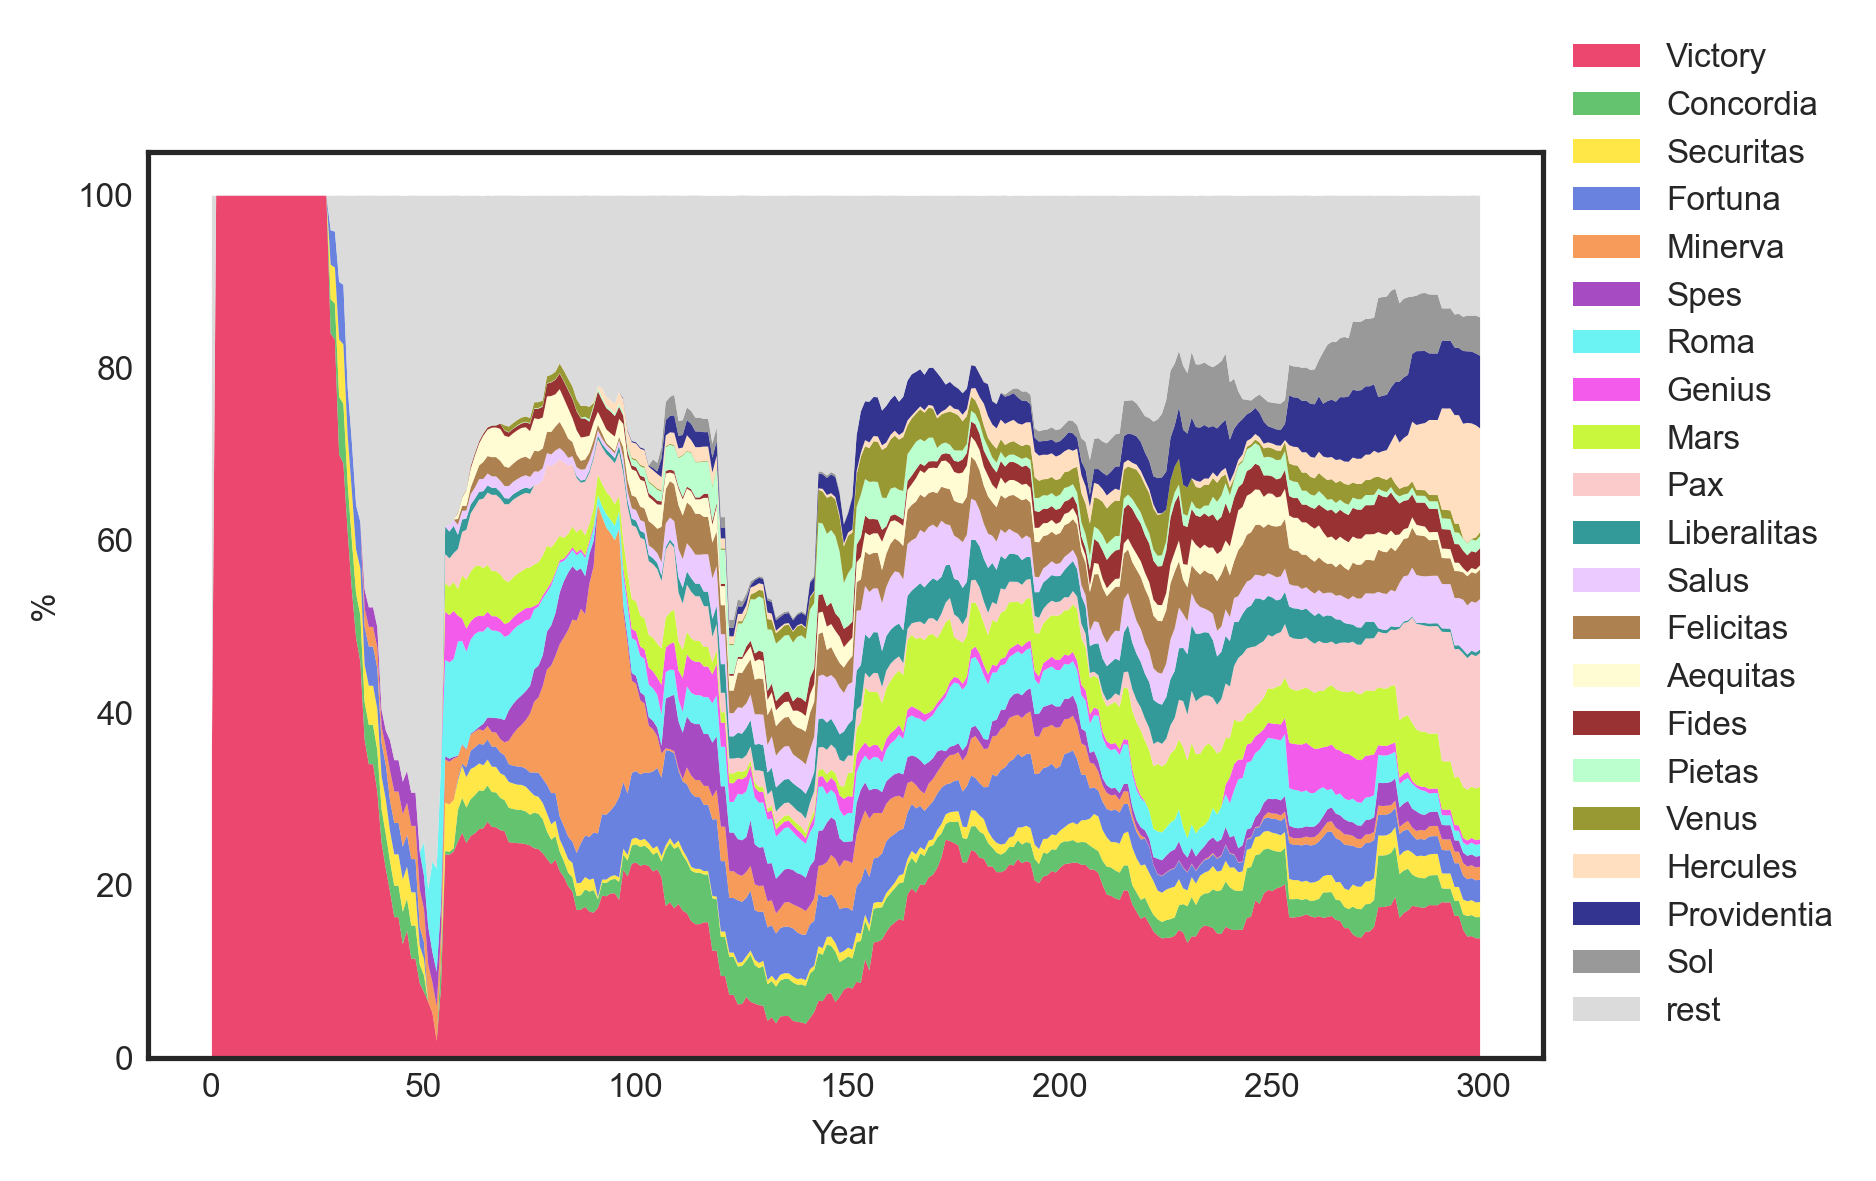

In [20]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df.index, date_freqs_dict.values(),
             labels=date_freqs_dict.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1,0))
ax.set_xlabel('Year')
ax.set_ylabel('%')

In [21]:
start, stop = 0, 300
diff = 10
data = []
for date in range(start, stop):
    subset = coins[coins["date_avr"].between(date-diff, date+diff)]
    if len(subset) > 0:
        deities_list_flat = [d for l in subset["deities"] for d in l]
        deities_count = len(deities_list_flat)
        deities_list_flat_bens = [d for d in deities_list_flat if d in ["Pax", "Securitas", "Felicitas", "Salus"]]
        deities_counts = nltk.FreqDist(deities_list_flat_bens).most_common()
        #most_common_total = np.sum([tup[1] for tup in deities_counts])
        deities_counts.append(("rest",  deities_count - len(deities_list_flat_bens)))
        deities_freqs_pct = [(tup[0], np.round(tup[1] / deities_count * 100, 2)) for tup in deities_counts]
        year_data = {"date": date,
                     "n" : deities_count,
                     "counts" : deities_counts,
                     "freqs_pct" : deities_freqs_pct}
    else:
        year_data = {"date" : date,
                     "n" : 0,
                     "counts" : [],
                     "freqs_pct" : []}
    print(year_data)
    data.append(year_data)

{'date': 0, 'n': 28, 'counts': [('rest', 28)], 'freqs_pct': [('rest', 100.0)]}
{'date': 1, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 2, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 3, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 4, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 5, 'n': 6, 'counts': [('rest', 6)], 'freqs_pct': [('rest', 100.0)]}
{'date': 6, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 7, 'n': 7, 'counts': [('rest', 7)], 'freqs_pct': [('rest', 100.0)]}
{'date': 8, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 9, 'n': 8, 'counts': [('rest', 8)], 'freqs_pct': [('rest', 100.0)]}
{'date': 10, 'n': 9, 'counts': [('rest', 9)], 'freqs_pct': [('rest', 100.0)]}
{'date': 11, 'n': 9, 'counts': [('rest', 9)], 'freqs_pct': [('rest', 100.0)]}
{'date': 12, 'n': 12, 'counts': [('rest', 12)], 'freqs_pct': [('rest', 1

In [22]:
date_freqs_df_4bens = pd.DataFrame([dict([("date", el["date"])]  + el["freqs_pct"]) for el in data])
date_freqs_df_4bens.set_index("date", inplace=True)
date_freqs_df_4bens = date_freqs_df_4bens[["Securitas", "Pax", "Salus", "Felicitas", "rest"]]
date_freqs_df_4bens

,Securitas,Pax,Salus,Felicitas,rest
date,,,,,
0,NaN,NaN,NaN,NaN,100.00
1,NaN,NaN,NaN,NaN,100.00
2,NaN,NaN,NaN,NaN,100.00
3,NaN,NaN,NaN,NaN,100.00
4,NaN,NaN,NaN,NaN,100.00
...,...,...,...,...,...
295,1.73,15.49,5.80,3.17,73.80
296,1.72,15.29,5.69,3.38,73.92
297,1.73,15.35,5.71,3.39,73.83


In [23]:
date_freqs_df_4bens.fillna(0, inplace=True)  #,inplace=True)
date_freqs_dict_4bens = date_freqs_df_4bens.to_dict("list")  # ["column_dtypes]

In [24]:
date_freqs_df_4bens

,Securitas,Pax,Salus,Felicitas,rest
date,,,,,
0,0.00,0.00,0.00,0.00,100.00
1,0.00,0.00,0.00,0.00,100.00
2,0.00,0.00,0.00,0.00,100.00
3,0.00,0.00,0.00,0.00,100.00
4,0.00,0.00,0.00,0.00,100.00
...,...,...,...,...,...
295,1.73,15.49,5.80,3.17,73.80
296,1.72,15.29,5.69,3.38,73.92
297,1.73,15.35,5.71,3.39,73.83


In [25]:
colors = colors[:4] + ["lightgray"]
colors

['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 'lightgray']

(0.0, 27.0)

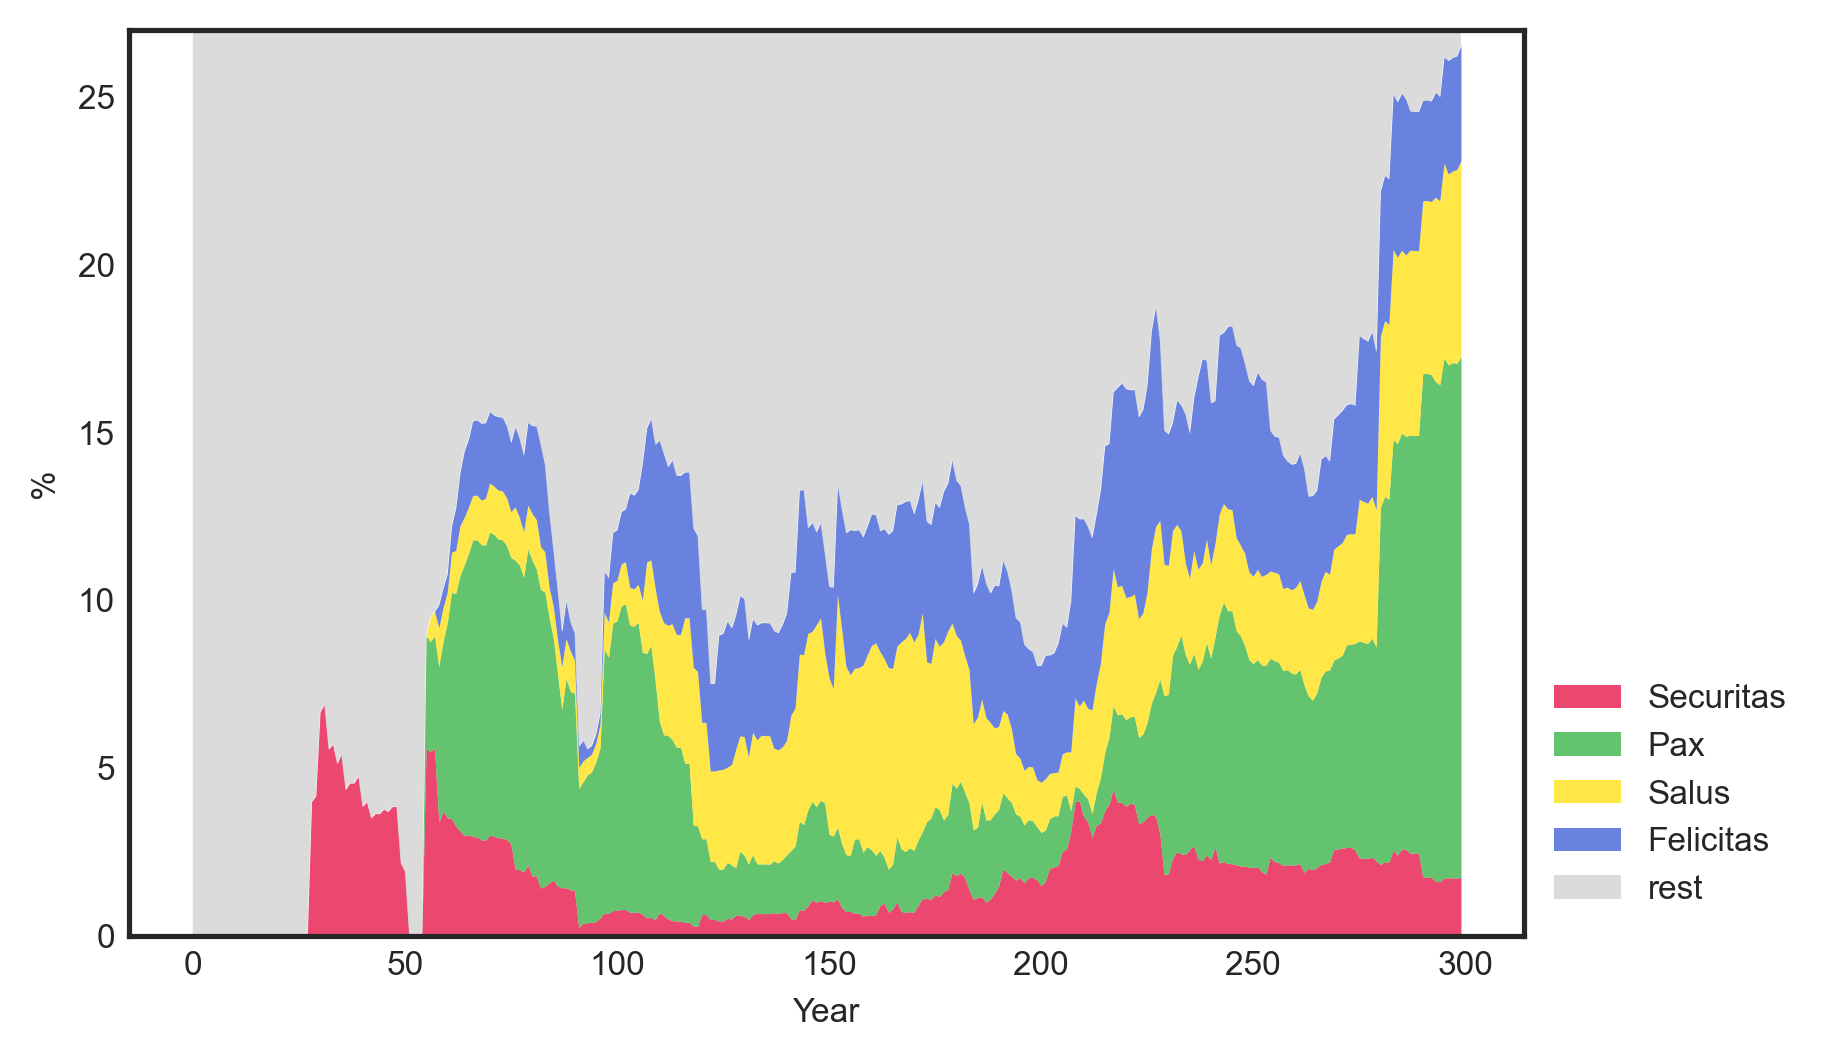

In [26]:
fig, ax = plt.subplots()
ax.stackplot(date_freqs_df_4bens.index, date_freqs_dict_4bens.values(),
             labels=date_freqs_dict_4bens.keys(), linewidth=0, colors=colors, alpha=0.8)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
ax.set_xlabel('Year')
ax.set_ylabel('%')
ax.set_ylim(0,27)

# coins to dates

In [27]:
start, stop = -100, 300
diff = 10
data = []
for date in range(start, stop):
    date_subset = coins[coins["date_avr"].between(date-diff, date+diff)]
    date_dict = {}
    date_dict["date"] = date
    date_dict["coins_n"] = len(date_subset)
    deities_list_flat = [d for l in date_subset["deities"] for d in l]
    date_dict["deities_n"] = len(deities_list_flat)
    if len(date_subset) > 0:
        deities_list_flat_top20 = [d for d in deities_list_flat if d in deities_top20]
        deities_counts_dict = dict(nltk.FreqDist(deities_list_flat_top20).most_common())
        date_dict.update(deities_counts_dict)
    print(date_dict)
    data.append(date_dict)

{'date': -100, 'coins_n': 0, 'deities_n': 0}
{'date': -99, 'coins_n': 0, 'deities_n': 0}
{'date': -98, 'coins_n': 0, 'deities_n': 0}
{'date': -97, 'coins_n': 0, 'deities_n': 0}
{'date': -96, 'coins_n': 0, 'deities_n': 0}
{'date': -95, 'coins_n': 0, 'deities_n': 0}
{'date': -94, 'coins_n': 0, 'deities_n': 0}
{'date': -93, 'coins_n': 0, 'deities_n': 0}
{'date': -92, 'coins_n': 0, 'deities_n': 0}
{'date': -91, 'coins_n': 0, 'deities_n': 0}
{'date': -90, 'coins_n': 0, 'deities_n': 0}
{'date': -89, 'coins_n': 0, 'deities_n': 0}
{'date': -88, 'coins_n': 0, 'deities_n': 0}
{'date': -87, 'coins_n': 0, 'deities_n': 0}
{'date': -86, 'coins_n': 0, 'deities_n': 0}
{'date': -85, 'coins_n': 0, 'deities_n': 0}
{'date': -84, 'coins_n': 0, 'deities_n': 0}
{'date': -83, 'coins_n': 0, 'deities_n': 0}
{'date': -82, 'coins_n': 0, 'deities_n': 0}
{'date': -81, 'coins_n': 0, 'deities_n': 0}
{'date': -80, 'coins_n': 0, 'deities_n': 0}
{'date': -79, 'coins_n': 0, 'deities_n': 0}
{'date': -78, 'coins_n': 0, 'de

# PNAS - lead pollution

In [28]:
pnas = pd.read_excel("../data/pnas.xlsx", sheet_name="Fig. 2", header=None)
pnas.head(10)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [29]:
pnas = pnas[7:].copy()
pnas["date"] = pnas[0].apply(lambda x: 1950.5 - x)
def clean_pol(pol):
    if pol == -0.999:
        pol = np.nan
    return pol
pnas["pollution"] = pnas[1].apply(clean_pol)
pnas.head(5)

NameError: name 'pnas' is not defined

In [189]:
pnas['pollution'].interpolate().rolling(11, center=True).mean()

7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
2039   NaN
2040   NaN
2041   NaN
2042   NaN
2043   NaN
Name: pollution, Length: 2037, dtype: float64

(0.0, 300.0)

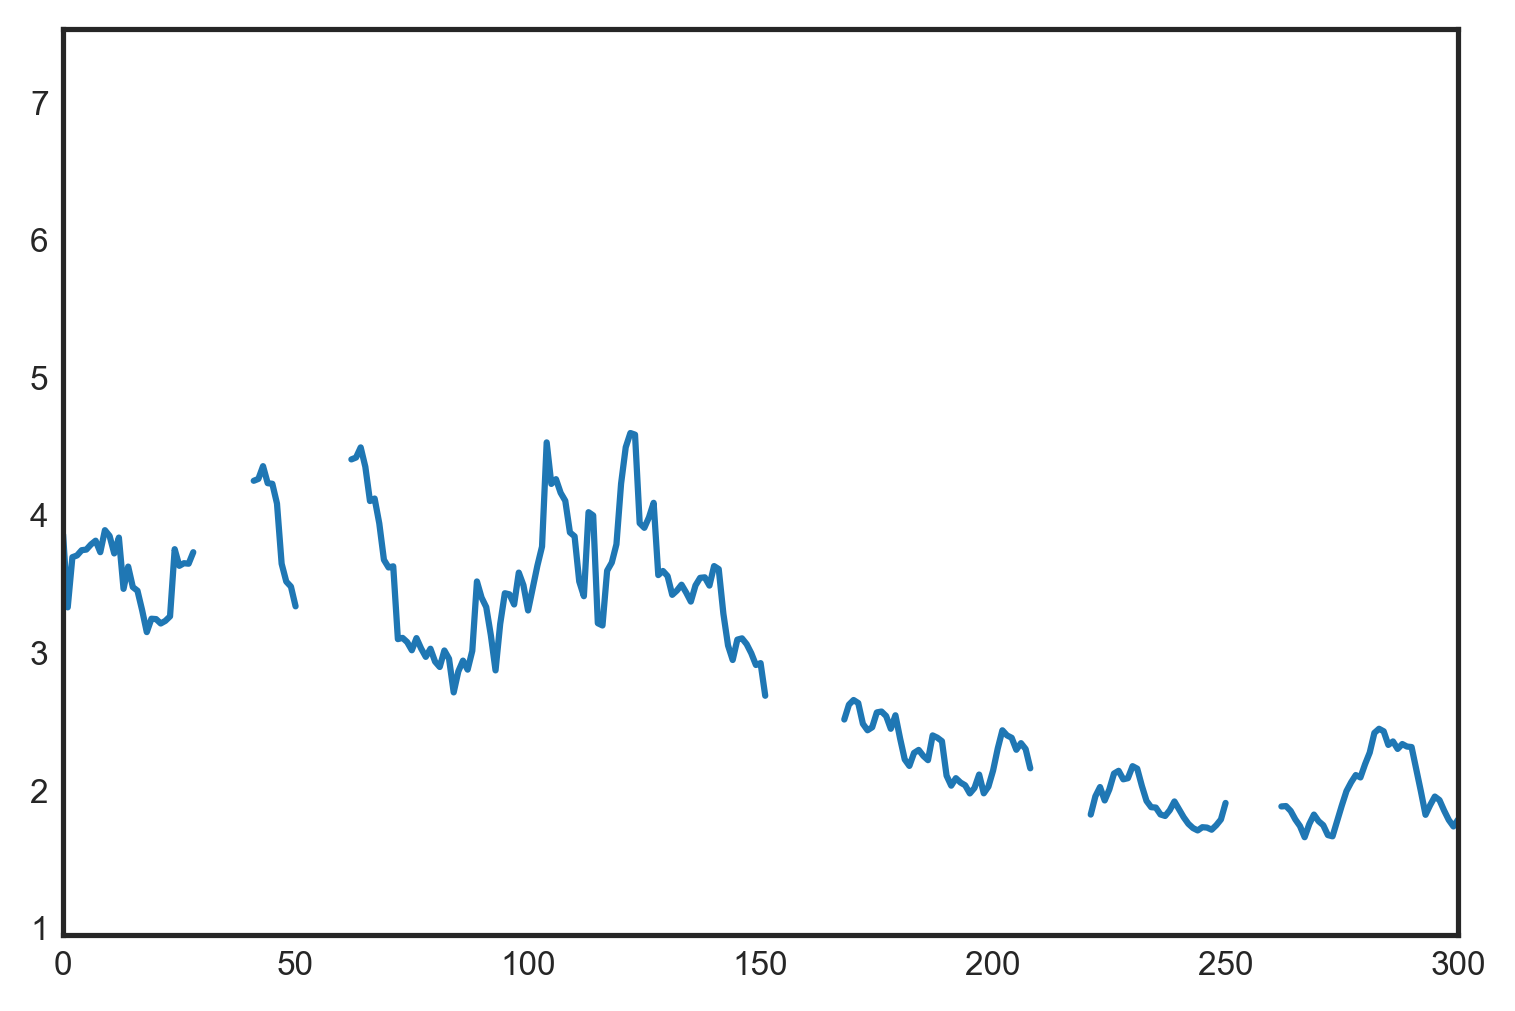

In [190]:
fig,ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution"].rolling(11, center=True).mean())
ax.set_xlim(0,300)

In [191]:
pnas['pollution_interpol'] = pnas['pollution'].interpolate()

(0.0, 300.0)

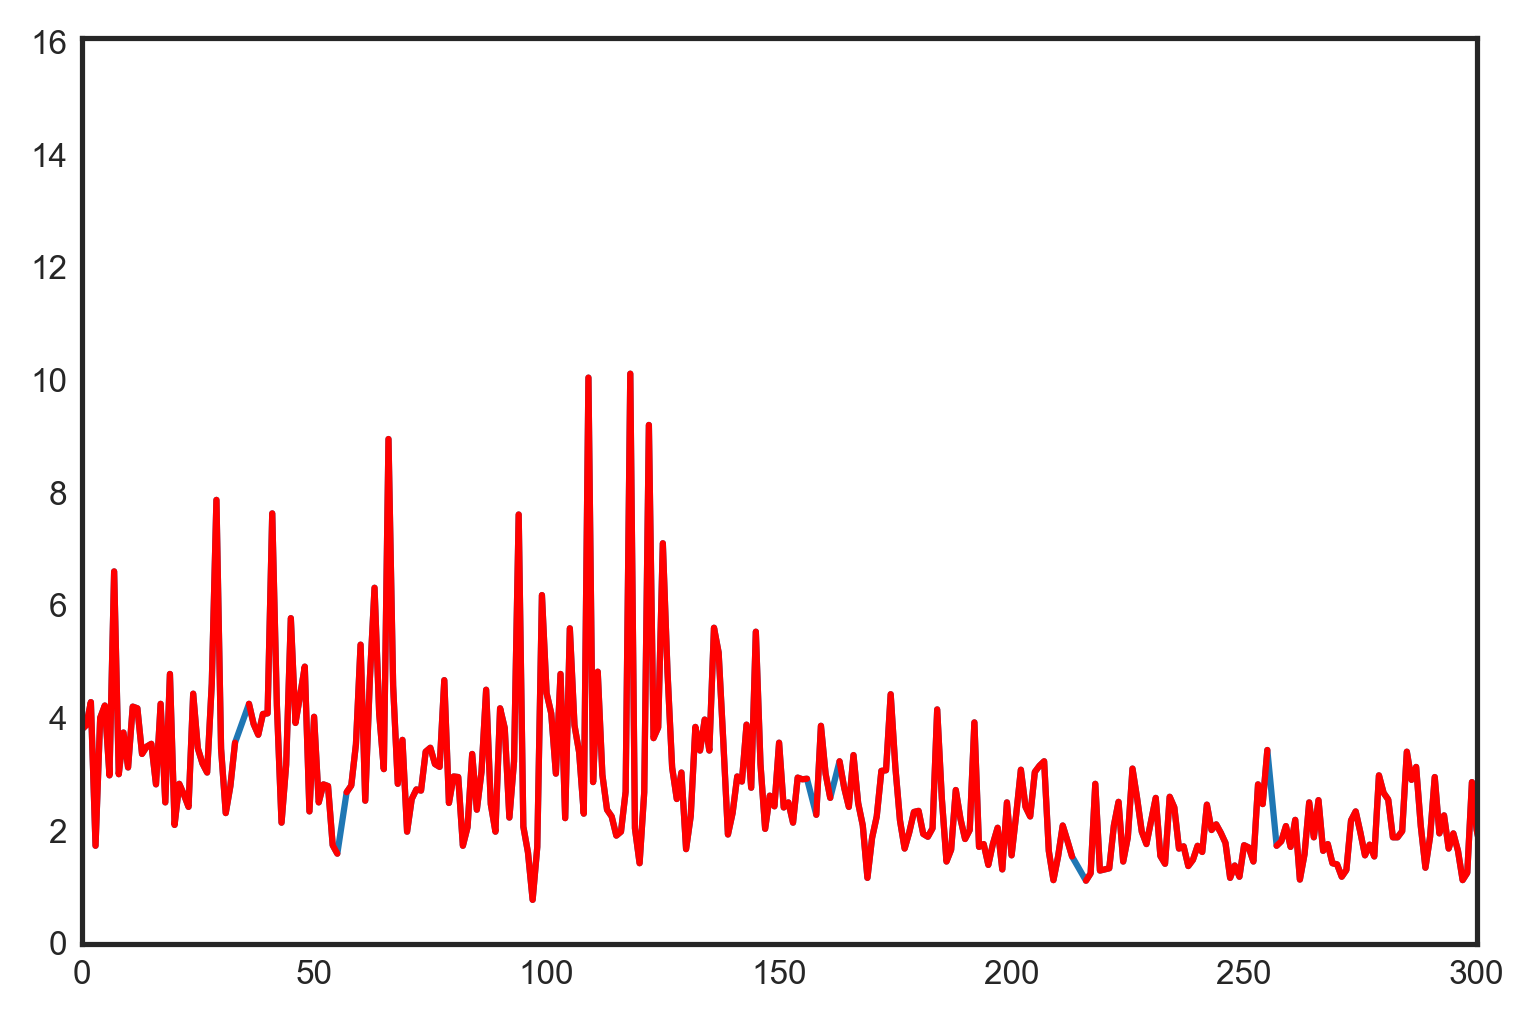

In [195]:
fig, ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution_interpol"])
ax.plot(pnas["date"], pnas["pollution"], color="red")
ax.set_xlim(0, 300)

(0.0, 300.0)

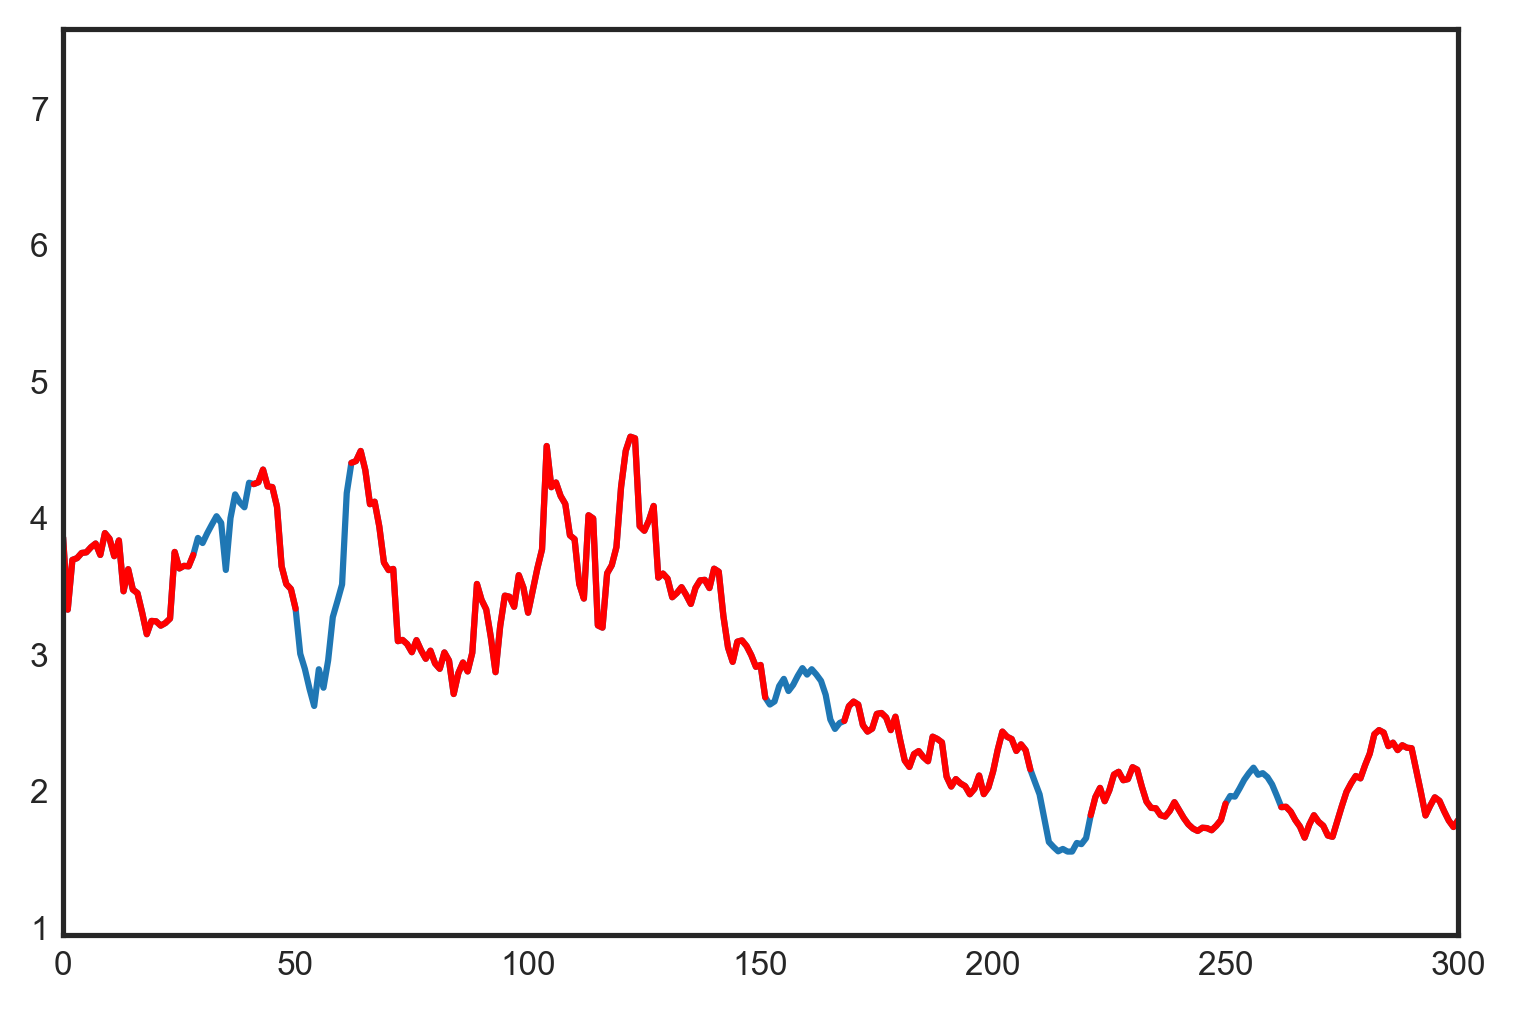

In [194]:
fig, ax = plt.subplots()
ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean())
ax.plot(pnas["date"], pnas["pollution"].rolling(11, center=True).mean(), color="red")
ax.set_xlim(0, 300)

In [298]:
date_freqs_df

,Victory,Concordia,Securitas,Fortuna,Minerva,Spes,Roma,Genius,Mars,Pax,...,Salus,Felicitas,Aequitas,Fides,Pietas,Venus,Hercules,Providentia,Sol,rest
date,,,,,,,,,,,,,,,,,,,,,
0,35.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.29
1,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14.89,1.79,1.73,2.75,1.50,1.20,1.14,0.54,5.92,15.49,...,5.80,3.17,0.48,2.03,1.38,0.06,13.28,8.43,3.95,14.06
296,14.11,2.37,1.72,2.55,1.48,1.24,1.24,0.53,5.87,15.29,...,5.69,3.38,0.47,1.96,1.36,0.06,13.93,8.30,4.15,13.87
297,14.16,2.44,1.73,2.56,1.49,1.25,1.37,0.54,5.95,15.35,...,5.71,3.39,0.48,1.96,1.37,0.06,13.38,8.33,4.16,13.92


In [299]:
deities_top20

['Victory',
 'Pax',
 'Mars',
 'Roma',
 'Fortuna',
 'Felicitas',
 'Providentia',
 'Concordia',
 'Salus',
 'Minerva',
 'Sol',
 'Liberalitas',
 'Aequitas',
 'Spes',
 'Hercules',
 'Pietas',
 'Fides',
 'Genius',
 'Securitas',
 'Venus']

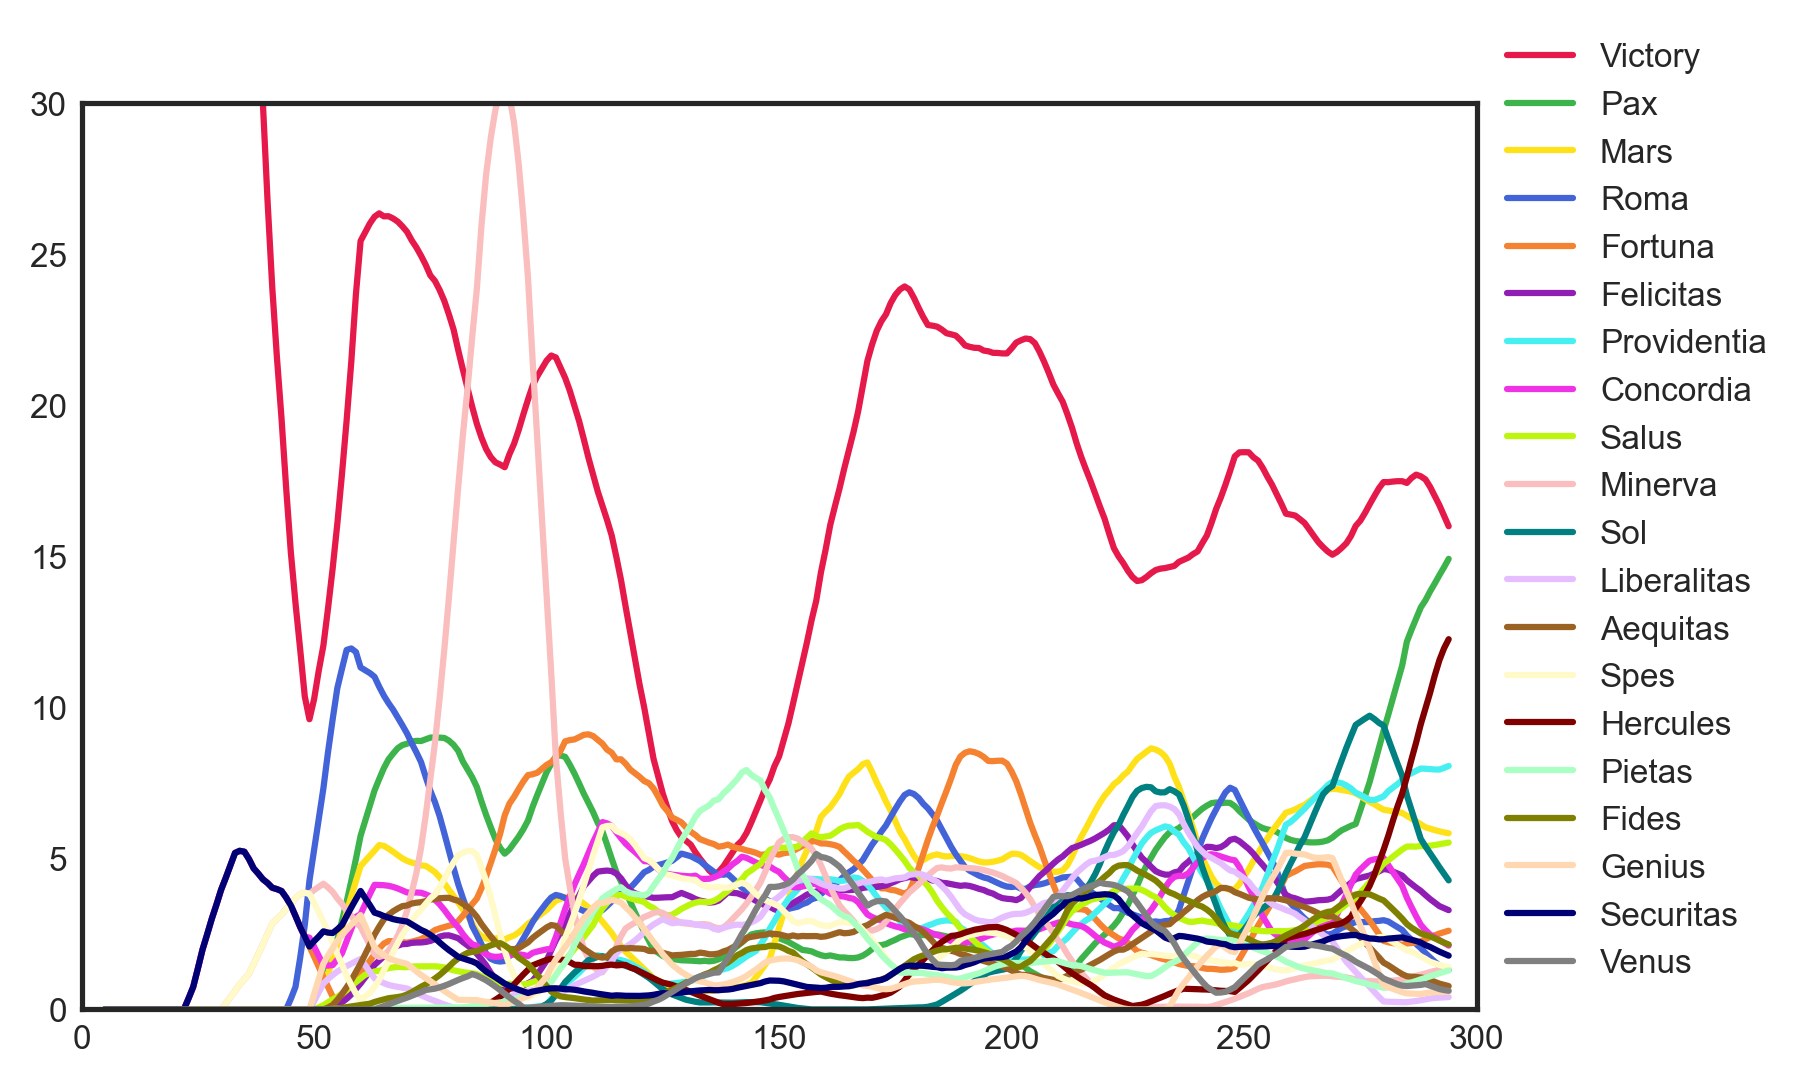

In [300]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    ax.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax.set_xlim(0, 300)
ax.set_ylim(0,30)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [301]:
def check_deity(deities_list, deity):
    if deity in deities_list:
        return True
    else:
        return False

<AxesSubplot:xlabel='date_avr', ylabel='Density'>

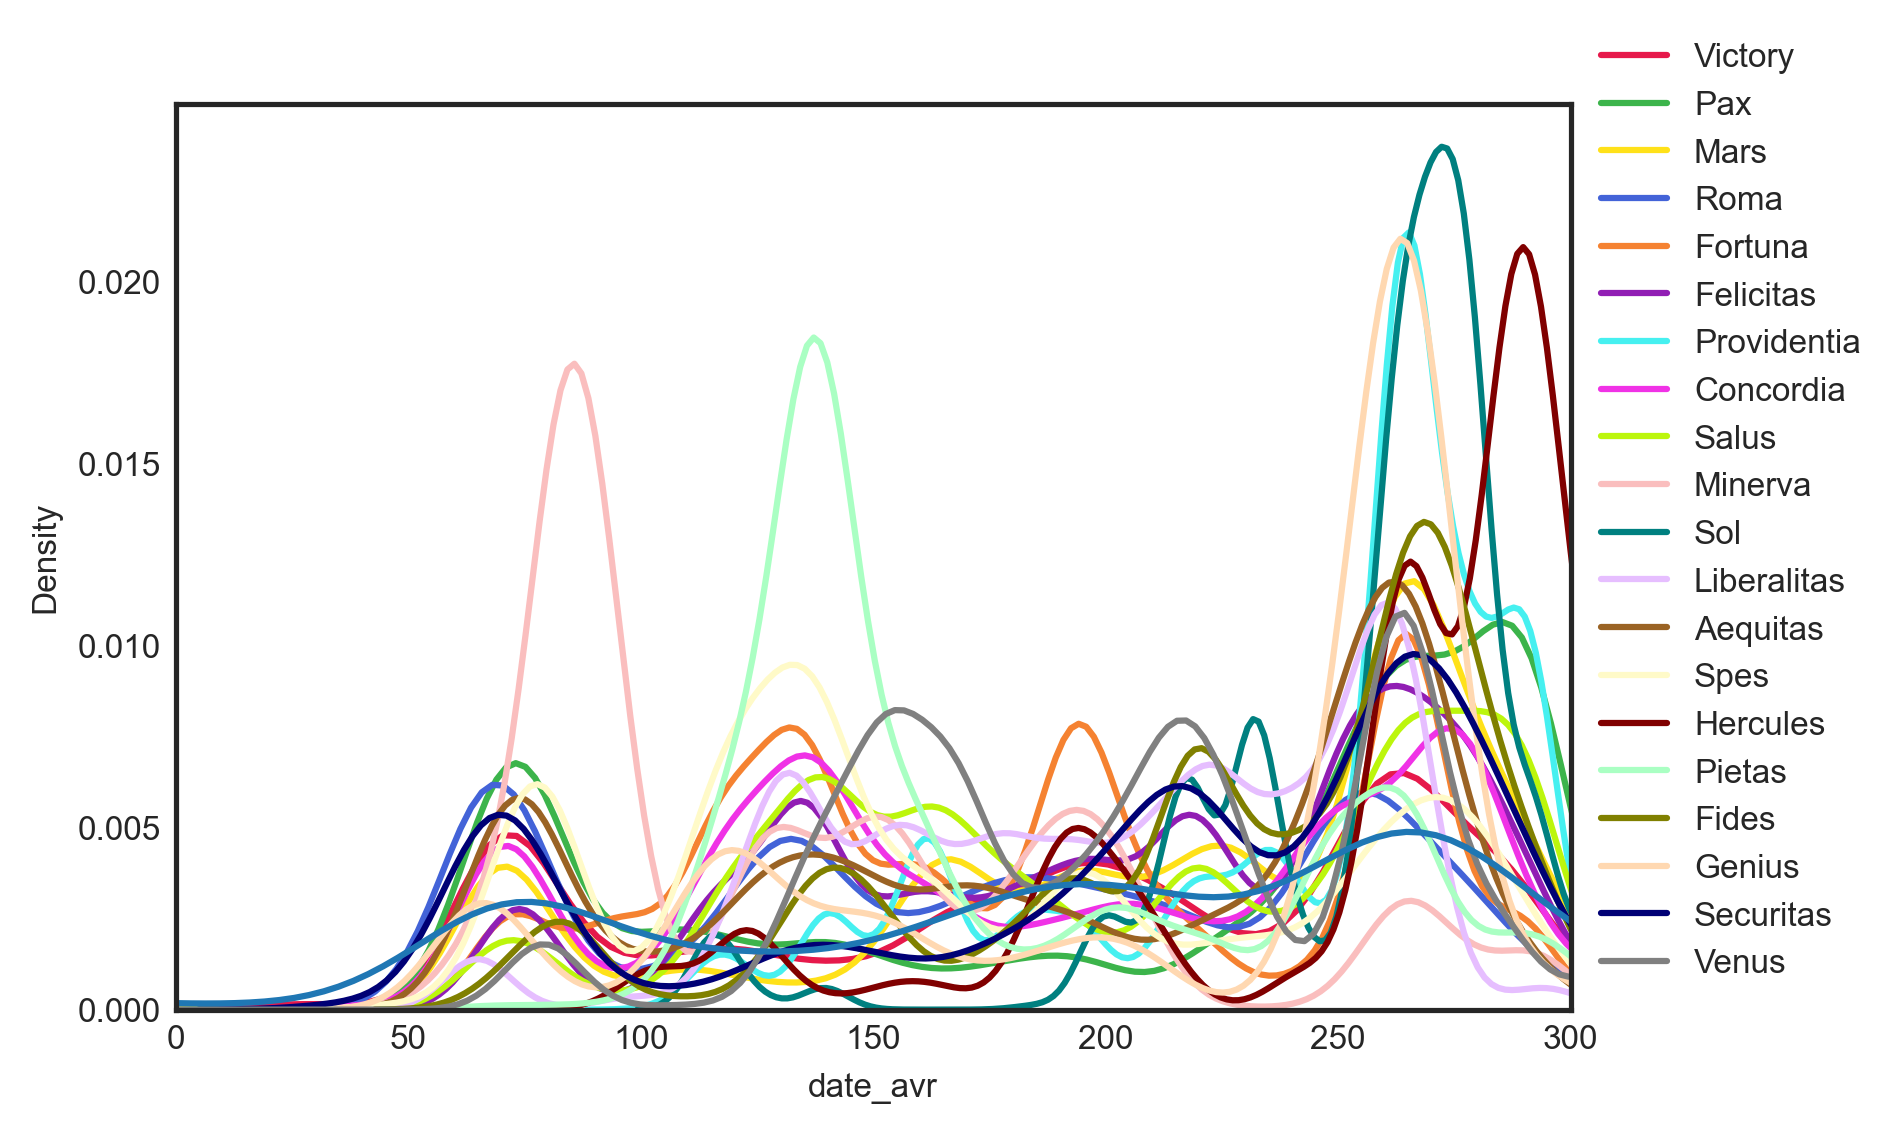

In [302]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 'lightgray']

fig, ax = plt.subplots()
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_top20, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_avr"], color=color, label=deity, bw_adjust=0.5)
ax.set_xlim(0, 300)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, "Victory"))]["date_avr"])




In [312]:
deities_select = ["Mars", "Pax", "Securitas", "Aequitas", "Felicitas", "Salus", "Fortuna", "Spes", "Pietas"]

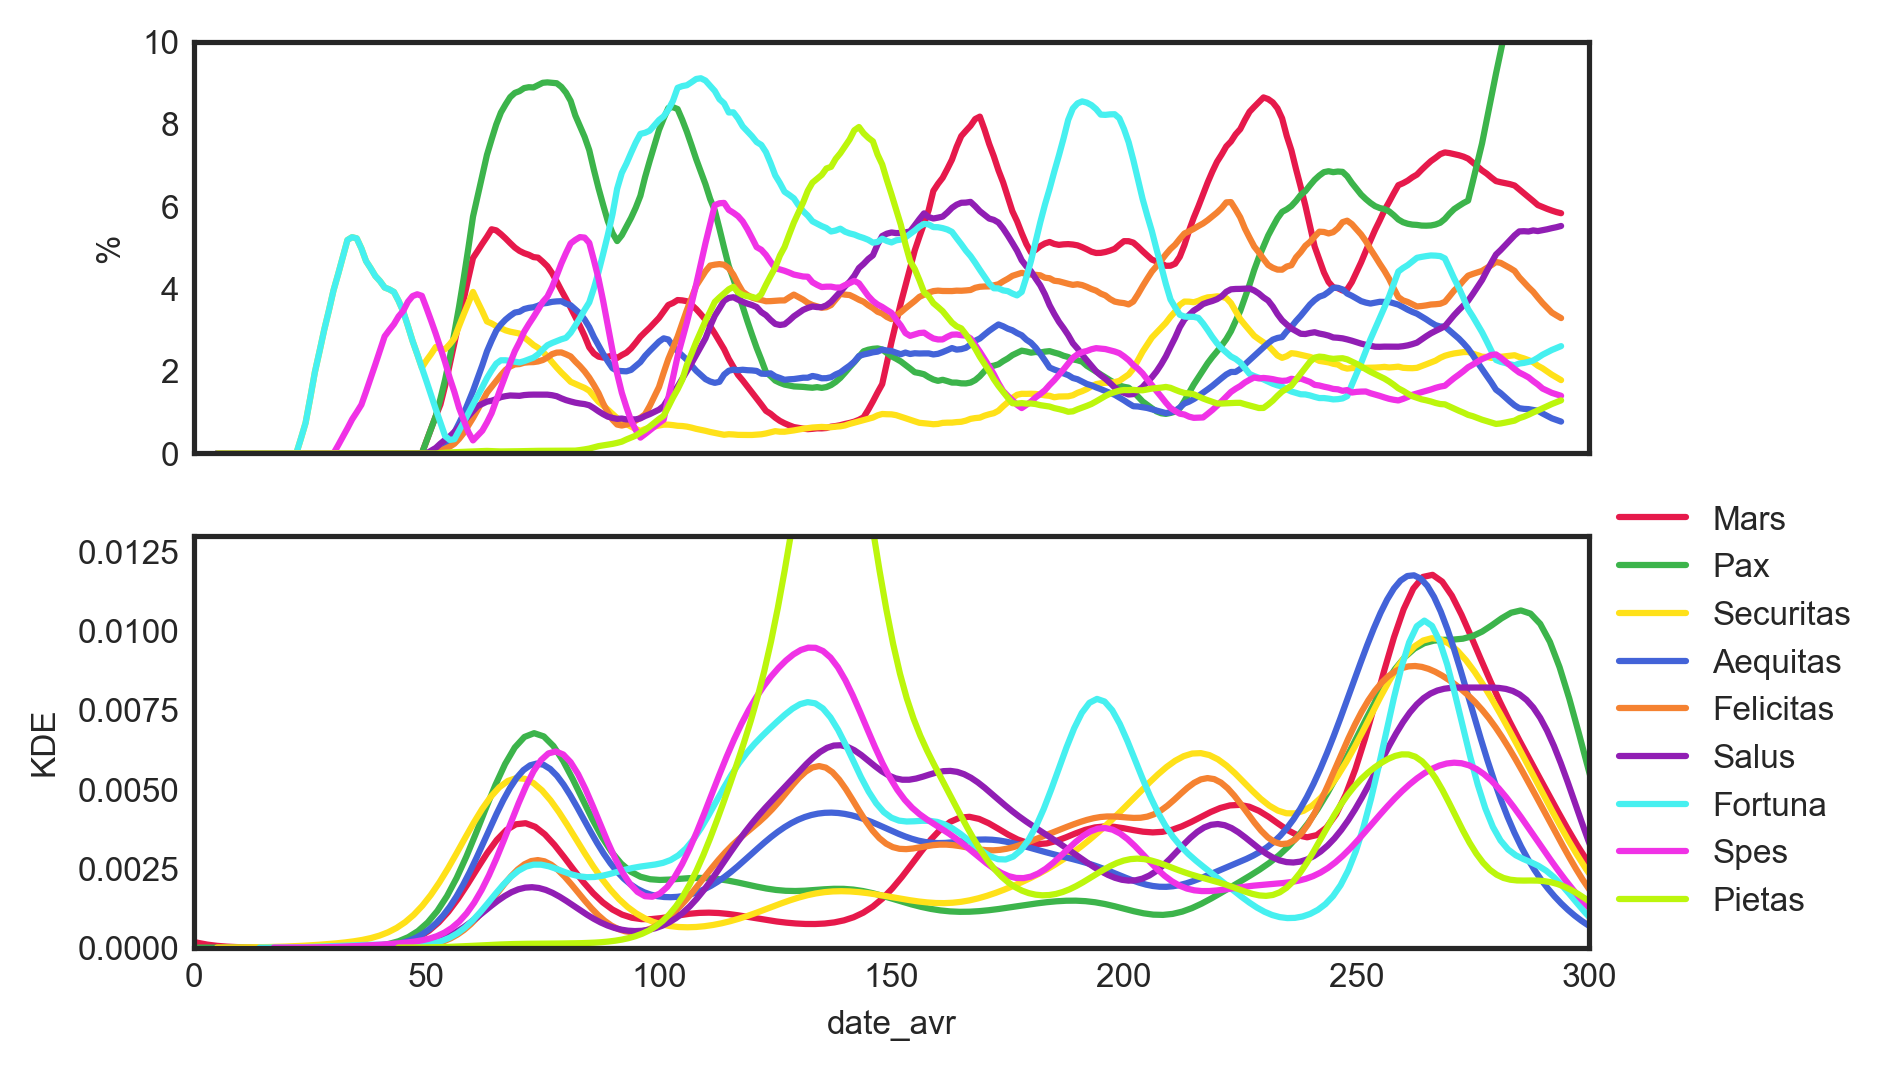

In [320]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

fig, [ax1, ax2] = plt.subplots(2,1)
#ax.plot(pnas["date"], pnas["pollution_interpol"].rolling(11, center=True).mean(), label="pollution (interpolated)", color="gray")

for deity, color in zip(deities_select, colors):
    ax1.plot(date_freqs_df.index, date_freqs_df[deity].rolling(11, center=True).mean(), color=color, label=deity)
ax1.set_xlim(0, 300)
ax1.set_ylim(0,10)
ax1.set_ylabel("%")
ax1.set_xticklabels([])
#ax1.legend(loc="lower left", bbox_to_anchor=(1,0))

for deity, color in zip(deities_select, colors):
    sns.kdeplot(coins[coins["deities"].apply(lambda x: check_deity(x, deity))]["date_avr"], color=color, label=deity, bw_adjust=0.5, ax=ax2)
ax2.set_xlim(0, 300)
ax2.set_ylim(0, 0.013)
ax2.set_ylabel("KDE")
ax2.legend(loc="lower left", bbox_to_anchor=(1,0))

In [ ]:
coins_by_date

In [ ]:
deities_top20

# Wars and battles

In [1]:
wars = pd.read_csv("../data/wars-and-battles.csv")
wars.head(5)

NameError: name 'pd' is not defined

# Time series analysis
- to correlate two time series data, you have to look at percentual returns, not raw data, otherwise the correlation is typically very high
-
-